# Classifying images as dogs or cats. 

#### By Benjamin Holczer 14/01/2020

In this example I will classify images as either cats or dogs using binary classification, one of the most frequently used machine learning problem. My aim will be to explore how to tackle image classification problems with small available dataset and to find the best model for the reduced size of dataset which is currently available on Kaggle. I will use convnets, data augmentation and to achieve better results I will leverage a pre-trained model.

## Table of Content

* <a href='#1'> 1. Dataset</a>
    * <a href='#1.1'> 1.1. Objective</a>
    * <a href='#1.2'> 1.2. Loading Data</a>
* <a href='#2'> 2. Prepairing Data </a>
* <a href='#3'> 3. Building a baseline convulational neural network.</a>
    * <a href='#3.1'> 3.1. One Block Model</a>
    * <a href='#3.2'> 3.2. Four Block Model</a>
* <a href='#4'> 4. Improving Our Model</a>
    * <a href='#4.1'> 4.1. Dropout</a>
    * <a href='#4.2'> 4.2. Data Augmentation</a>
* <a href='#5'> 5. Leveraging a Pre-Trained Network</a>
    * <a href='#5.1'> 5.1. Running the convulational base over our dataset.</a>
    * <a href='#5.2'> 5.2. Extending the convulational base by adding dense layers on top.</a> 
    * <a href='#5.3'> 5.3. Fine-Tuning</a>
* <a href='#6'>6. Conclusion</a>

 <a id='1'></a>
 ## 1. Dataset

The cats and dogs dataset was available by Kaggle.com as part of computer vision competition in 2013. The dataset is available at: https://www.kaggle.com/c/dogs-vs-cats/data. After uncompressing the zip file we have 2 seperate folder available. One folder for training it contains 25,000 samples, 12,500 from each class (cats and dogs) and a seperate folder for testing which contains 12,500 images. The Dataset contaings JPEG image files and on each image we can see either a cat or a dog. 

<a id='1.1'></a>
### 1.1. Objective

My measure of success will be accuraccy as I am facing with a binary classification where each outcome is equally likely. My aim is to develop the best model for the small size of the dataset. My evaloution protocol will be simple hold-out validation and now I will load and prepare my data according to that.

<a id='1.2'></a>
### 1.2. Loading Data

I have followed the book, Deep Learning with Python's workflow and I now will seperate a small portion of the dataset. The following codes will create a new directory and 3 subsets from the original train directory. We will already split our data into a training set with 1000 samples of each class, a validation set with 500 samples of each class and a test set of 500 samples of each class.

In [1]:
import os, shutil

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = './dataset'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


Now we will count if have the correct number of tests in each directory.

In [37]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Now lets visualize some of our training data.

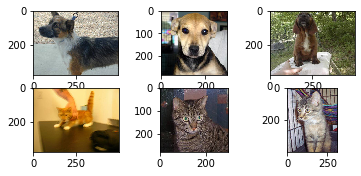

In [59]:
import matplotlib.pyplot as plt

# plot 3 cats dogs
for i in range(3):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = train_dogs_dir + '/dog.' + str(3+i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
    
# plot 3 cats
for i in range(3):
    # define subplot
    plt.subplot(330 + 4 + i)
    # define filename
    filename = train_cats_dir + '/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
    
# show the figure
plt.show()

<a id='2'></a>
## 2. Prepairing Data

Before I feed my data into my network it needs to be pre-processed as floating point tensors. Therefore, I need to decode our JPEG pictures to RBG grids of pixels which then can be converted into floating point tensors.The pixels also needs to be rescaled from [0, 255] interval to [0,1]. To turn the pictures on my drive into tensors I will use the ImageDatatGenerator class from keras.preprocessing.image which automatically does the hardwork for me. 

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


<a id='3'></a>
## 3. Building a baseline convulational neural network.

Our initial goal is to build a model that beats the common sense baseline. We have 2 outputs and we have the same amount of samples of each categories therefore to achieve the the statistical power we need to develop a model which has accuracy greater than 0.5. To start with I fill follow the general architectural principles of the VGG models. The architecture involves stacking convolutional layers with small 3x3 filters followed by a max pooling layer. 


The outpout of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).Before the output goes through the two dense layer in the end they need to be flattened 1D into vectors, therefore after convnet layer(s) we need to use a 'flattened' layer.

In [61]:
from keras import layers
from keras import models

<a id='3.1'></a>
### 3.1. One Block Model

Firstly, I will build a 1 block VGG style architecture for the cats a and dogs dataset which has a single convulational layer and pooling layer. I will configure our convent to presecc inputs of size (150,150,3) which is the format of our images. We have relu activation at the dense layer and convulational layer and it is a binary classification we have one output a number between 0-1 therefore we use sigmoid activation.

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               22429824  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 22,430,849
Trainable params: 22,430,849
Non-trainable params: 0
_________________________________________________________________


> We can see ehere that the conv2D layer and MaxPooling2D layer are both having a 3D output shape which is then flattened into a 1D vectors

Our loss function will be binary crossentropy as we are facing a binary classification problem. We will use RMS prop as our optimizer with a  small 0.0001 learning rate. We will monitize our results using accuracy metrics.

In [67]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Now let's run our model using 30 epochs and 100 steps/epochs and 50 validation steps.

In [68]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 291ms/step - loss: 0.8828 - acc: 0.5490 - val_loss: 1.0113 - val_acc: 0.5410
Epoch 2/30
100/100 [==============================] - 29s 289ms/step - loss: 0.6978 - acc: 0.5820 - val_loss: 0.5758 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 42s 422ms/step - loss: 0.6101 - acc: 0.6570 - val_loss: 0.7109 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 34s 338ms/step - loss: 0.5544 - acc: 0.7145 - val_loss: 0.6430 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 32s 320ms/step - loss: 0.4844 - acc: 0.7800 - val_loss: 0.6284 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 31s 311ms/step - loss: 0.4309 - acc: 0.8155 - val_loss: 0.5954 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 32s 317ms/step - loss: 0.3766 - acc: 0.8465 - val_loss: 0.6472 - val_acc: 0.6500
Epoch 8/30
100/100 [==============================] - 3

In [70]:
# saving our model
model.save('cats_and_dogs_small_1.h5')

Now lets plot the results.

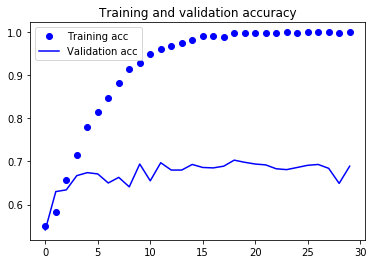

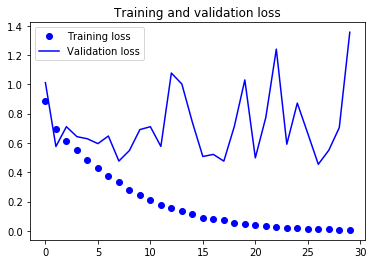

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> We can see that our model has a 68%-70% accuracy on the validation set easily beating the statistacal power, but our model begins to overfit already after a couple of epochs.

<a id='3.2'></a>
### 3.2. Four Block Model

As we are dealing with larger images it makes sense to increase our network, therefore our next model will be a similar but this time we will apply 4 convulational layer and and 4 pooling layer one of each in every block. 

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

Lets run this model.

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 40s 404ms/step - loss: 0.6936 - acc: 0.5345 - val_loss: 0.6758 - val_acc: 0.5550
Epoch 2/30
100/100 [==============================] - 40s 401ms/step - loss: 0.6671 - acc: 0.5985 - val_loss: 0.6705 - val_acc: 0.5940
Epoch 3/30
100/100 [==============================] - 44s 442ms/step - loss: 0.6434 - acc: 0.6285 - val_loss: 0.5946 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 42s 422ms/step - loss: 0.6051 - acc: 0.6885 - val_loss: 0.5508 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 42s 419ms/step - loss: 0.5567 - acc: 0.7175 - val_loss: 0.7939 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 42s 415ms/step - loss: 0.5270 - acc: 0.7420 - val_loss: 0.5056 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 42s 421ms/step - loss: 0.4940 - acc: 0.7605 - val_loss: 0.5791 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 4

In [86]:
# saving our model
model.save('cats_and_dogs_small_2.h5')

It is always useful to plot the results

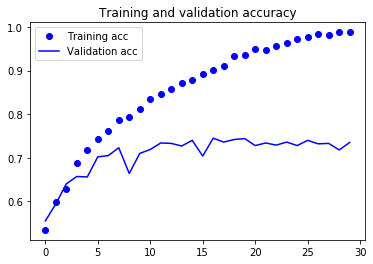

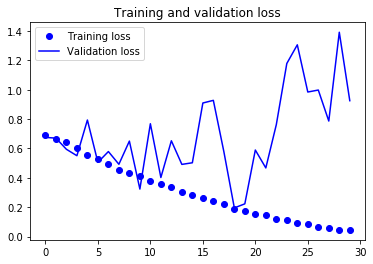

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> Our model has slightly improved as we have achieved a 70%-72% accuracy on the validation set and a lower overal validation loss. However we can see that our model still overfits already after 5 epochs. Interesting to note when I ran the same model on the whole dataset I have received here already 80% accuracy, but it took 29 minutes on my laptop while with this smaller dataset it only took 20 minutes.

<a id='4'></a>
## 4. Improving our model

As we are using a small dataset our main problem will be overfitting when we will try to improve our model. In this section I will try to use a couple of techniques to try to mitigate overfitting.

<a id='4.1'></a>
### 4.1. Dropout

Firstly, I will try to implement dropout regularization to see how that effects the overfitting. Dropout is one of the most effective and most commonly used regularization techniques. Applying dropout to a layer will randomly setting several outputs to 0 in a vector during training. In this model we will apply one dropout layer just before our dense layers with a 0.5 dropout rate, meaning at test time it will cale down the output by the dropout rate.

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [73]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 42s 424ms/step - loss: 0.6926 - acc: 0.5215 - val_loss: 0.6754 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6693 - acc: 0.5855 - val_loss: 0.5852 - val_acc: 0.5480
Epoch 3/30
100/100 [==============================] - 45s 449ms/step - loss: 0.6406 - acc: 0.6320 - val_loss: 0.6058 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 42s 416ms/step - loss: 0.6028 - acc: 0.6690 - val_loss: 0.4994 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 42s 418ms/step - loss: 0.5696 - acc: 0.6965 - val_loss: 0.5989 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5462 - acc: 0.7145 - val_loss: 0.7321 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 42s 424ms/step - loss: 0.5260 - acc: 0.7365 - val_loss: 0.7126 - val_acc: 0.6620
Epoch 8/30
100/100 [==============================] - 4

In [76]:
# saving our model
model.save('cats_and_dogs_small_dropout.h5')

Now lets plot the results

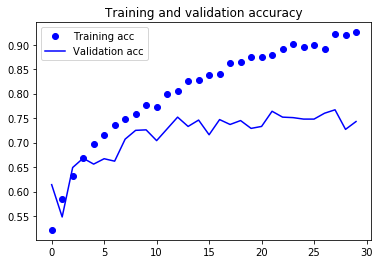

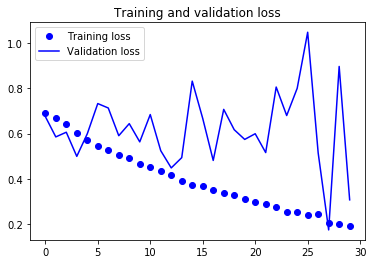

In [77]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> We have already achieved a great ~75% result and we can see that our validation accuracy still improves until the 20th epochs. This is different with our validation loss while we can see that the training loss was continously improving reaching only 0.2, on the validation set the results were very different from epochs to epochs resulting a very erratic graph.

<a id='4.2'></a>
### 4.2. Data Augmentation

We have achieved a great result using dropout layer, but there is still plenty of place for improvement. Our main problem is still overfitting, therefore the best way to improve that is to increase our datasett. Data Augmentation is a good way to do that. It generates more training data from the already available ones by performing random transformations on the images. The objective is that our model won't see the exact same data twice during training time.

This can be simple done in keras by using ImageDataGenerator which will perform random tranformations on our imagaes.

In [78]:
# configuring transformations
datagen = ImageDataGenerator(
    # sets a rotation range between 0-180
    rotation_range=40,
    # transofrmation in width range
    width_shift_range=0.2,
    # transformation in height range
    height_shift_range=0.2,
    # shear range for randomly applying shearing transformations
    shear_range=0.2,
    # zoom range
    zoom_range=0.2,
    # enable to flip data horizontally
    horizontal_flip=True,
    fill_mode='nearest')

Now lets plot an example how one the data has been augmented.

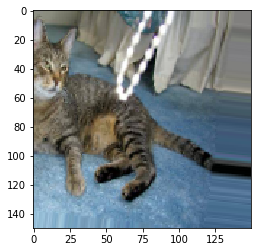

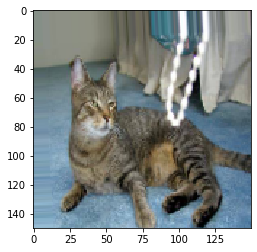

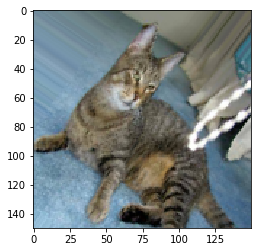

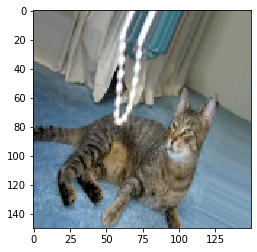

In [79]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [105]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now let's run the same model with the dropout layer and the augmented dataset with an increased batch size.

In [81]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 58s 578ms/step - loss: 0.5213 - acc: 0.7393 - val_loss: 0.4133 - val_acc: 0.7627
Epoch 2/100
100/100 [==============================] - 58s 576ms/step - loss: 0.5156 - acc: 0.7403 - val_loss: 0.4002 - val_acc: 0.7661
Epoch 3/100
100/100 [==============================] - 58s 575ms/step - loss: 0.5025 - acc: 0.7677 - val_loss: 0.5060 - val_acc: 0.7817
Epoch 4/100
100/100 [==============================] - 57s 574ms/step - loss: 0.5140 - acc: 0.7437 - val_loss: 0.5194 - val_acc: 0.7945
Epoch 5/100
100/100 [==============================] - 58s 575ms/step - loss: 0.5123 - acc: 0.7509 - val_loss: 0.4739 - val_acc: 0.7703
Epoch 6/100
100/100 [==============================] - 58s 577ms/step - loss: 0.4982 - acc: 0.7554 - val_loss: 0.6609 - val_acc: 0.7268
Epoch 7/100
100/100 [==============================] - 58s 580ms/step - loss: 0.4942 - acc: 0.7610 -

In [82]:
model.save('cats_and_dogs_small_dropout_dataaug.h5')

Now lets plot the results

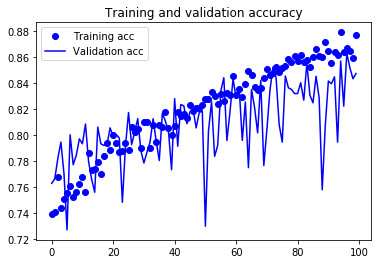

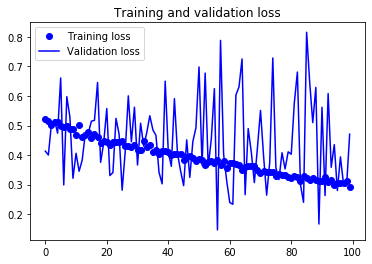

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We have received a very erratic graph so let's smooth that out.

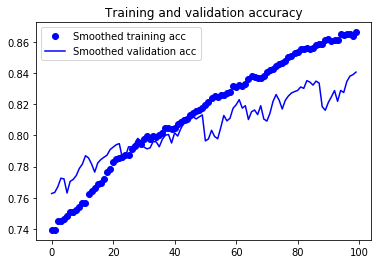

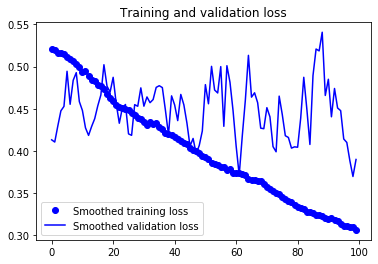

In [85]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> We can see that we have achieved significantly better accuracy reaching 84% and on the first graph we can clearly see that we no longer overfit, however on the other graphs there are still lots of outliers, and this was a computationally expensive solution taking 1.5 hours for my laptop.

<a id='5'></a>
## 5. Leveraging a Pre-Trained Network

We have already built 4 models using the given dataset and achieved significant improvements on the validation set let's take a reminder:

- 1st Model: 1 Convnet Block, 68%-70% accuracy.
- 2nd Model: 4 Convnet Block, ~72% accuracy.
- 3rd Model: 4 Convnet Block + dropout, ~ 75% accuracy 
- 4th Model: 4 Convnet Block + dropout + data augmantiation, reaching 84%


Now let's see if we can improve these results by leveraging a pre-trained convnet, which is a very common and highly effective approach to deep learning on small image datasets. A pre-trained network is a network which have been privously trained on a large dataset. To be able to achieve great results it is good if the dataset is somewhat similar to dataset what we are currently working on. For the cats and dogs problems we will use a convnet previously trained on the ImageNet dataset. Which contains 1.4 million labeled images and 1000 different classes. This will be a particularly good dataset for us as it will have several pictures containing animals.

We will connect the pre-trained model to our model using feautre extraction. Feautre extraction will take the convulational base of the pre-trained network and will run it on our new data creating a new classifier on top of the output.

The VGG16 network which was trained on the ImageNet dataset comes pre-packaged with Keras. We need to set the input shape of the network where the conv_base will be fed which is the cats and dogs dataset's shape (150,150,3).

In [1]:
# I have moved to desktop therefor I need import them again
import keras
import os, shutil

Using TensorFlow backend.


In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Now lets see the model summary of the convulational base.

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

It is important to note the final feature map has a (4,4,512) shape, because we will put our densely connected classifier on the top of this. Now we will have two options how to move forward one computationally cheap which is running the convulational base over our dataset and a computationally expensive which is extending the convulational base by adding dense layers on top.

At this point I had to change to desktop as my Laptop was working very slowly.

<a id='5.1'></a>
### 5.1. Running the convulational base over our dataset.

We will start with the first method which was mentioned above. I wil run the convulational base over our datase, which will record its output to a Numpy array on disk. This is a computationnaly cheap method, however we are not able to use data augmentation as it runs the convulational base only once for every image.

(I have moved from my laptop to desktop, therefore it seemed the best option to import everything again instead of running everything again in the notebook.)

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


As we have previously noted that top layer in our convulational base has a 3D output, firstly we need to make sure it is flattened before it is fed into our densely connected classifier.

In [5]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

As previously mentioned here we cannot use data augmentiation, however we will implement a dropout for regularization. Now we can train our densely connected classifier on the data and labels that we just recorded.

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 291us/step - loss: 0.6365 - acc: 0.6460 - val_loss: 0.4676 - val_acc: 0.8200
Epoch 2/30
2000/2000 [==============================] - 0s 226us/step - loss: 0.4497 - acc: 0.7955 - val_loss: 0.3981 - val_acc: 0.8320
Epoch 3/30
2000/2000 [==============================] - 0s 228us/step - loss: 0.3775 - acc: 0.8435 - val_loss: 0.3437 - val_acc: 0.8750
Epoch 4/30
2000/2000 [==============================] - 0s 229us/step - loss: 0.3283 - acc: 0.8720 - val_loss: 0.3159 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 0s 214us/step - loss: 0.3034 - acc: 0.8805 - val_loss: 0.2987 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.2783 - acc: 0.8925 - val_loss: 0.2844 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 0s 217us/step - loss: 0.2552 - acc: 0.9000 - val_loss: 0.2736 - val_acc: 0.8990


In [7]:
model.save('cats_and_dogs_small_5.h5')

Now let's plot the results.

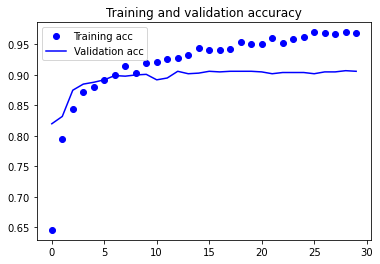

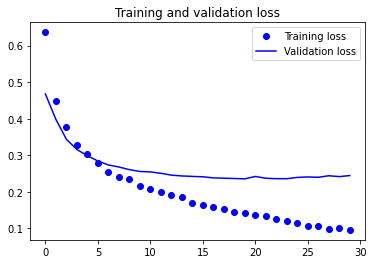

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> With this method we have built our best model so far with achieving a 90% accuracy on the validation set, however our model start to overfit already after a few epochs. In section 4 data augmentation seemed to be a great way to prevent overfitting so it is time to combine a network where we leverage a convnet and we also use data augmentation.

<a id='5.2'></a>
### 5.2. Extending the convulational base by adding dense layers on top.

Let's move on to our second feature extraction technique, here I will add dense layers on the top of the convulational base and it will run every input image through the convulational base every time it is seen by the model. This technique is very expensive and slow when I tried to run this model on my laptop and would have taken 13 hours.

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


> We can see that we have a huge model with over 16 million trainable parameter.

To train our model we need to makse sure that convulational_base weight are not updating during training, to freeze a particular layer in keras we need to set the network trainable attriube to False.

In [11]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [12]:
conv_base.trainable = False

In [13]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


This is the number of trainable weights after freezing the conv base: 4
With this setup, only the weights from the two Dense layers that we added will be trained. That's a total of four weight tensors: two per layer (the main weight matrix and the bias vector). Note that in order for these changes to take effect, we must first compile the model. If you ever modify weight trainability after compilation, you should then re-compile the model, or these changes would be ignored.

Now we can start training our model, with the same data augmentation configuration that we used in our previous example:

Now I will use data augmentation the same way as I used in section 4.2

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now let's train the model.

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 13s - loss: 0.6097 - acc: 0.6755 - val_loss: 0.4589 - val_acc: 0.8430
Epoch 2/30
 - 11s - loss: 0.4849 - acc: 0.7750 - val_loss: 0.3621 - val_acc: 0.8630
Epoch 3/30
 - 11s - loss: 0.4415 - acc: 0.8005 - val_loss: 0.3009 - val_acc: 0.8700
Epoch 4/30
 - 11s - loss: 0.4034 - acc: 0.8235 - val_loss: 0.5805 - val_acc: 0.8790
Epoch 5/30
 - 11s - loss: 0.3982 - acc: 0.8270 - val_loss: 0.2435 - val_acc: 0.8840
Epoch 6/30
 - 11s - loss: 0.3755 - acc: 0.8330 - val_loss: 0.2723 - val_acc: 0.8890
Epoch 7/30
 - 11s - loss: 0.3543 - acc: 0.8485 - val_loss: 0.2547 - val_acc: 0.8940
Epoch 8/30
 - 11s - loss: 0.3441 - acc: 0.8550 - val_loss: 0.2521 - val_acc: 0.8930
Epoch 9/30
 - 11s - loss: 0.3418 - acc: 0.8515 - val_loss: 0.1785 - val_acc: 0.8900
Epoch 10/30
 - 11s - loss: 0.3379 - acc: 0.8475 - val_loss: 0.2612 - val_acc: 0.8950
Epoch 11/30
 - 11s - loss: 0.3317 - acc: 0.8585 - val_loss: 0.2561 - val_acc: 0.8980
Epoch 12/30
 - 12s - loss: 0.3153 - acc: 0.8670 - val_loss: 0.3269 - val_a

In [16]:
model.save('cats_and_dogs_small_6.h5')

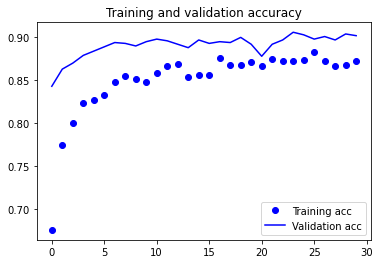

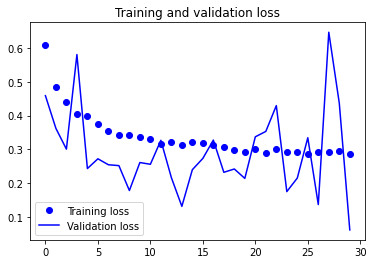

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> With this we have achieved a similar result as our previous model with ~90% accuracy, however it does not start to overfit as early as before but it would have taken 13 hours on my laptop while the other model would have been only a few seconds.

<a id='5.3.'></a>
### 5.3. Fine Tuning

In this section I will try one more widely used technique for leveraging a network which is fine-tuning. 

For our example we will freeze the lower layers in the convulational base it we will only fine-tune the top 3 layers which encode more specialized features. As the convulational model is a very large moder it is safer to go with only layers on our small dataset.

In [18]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now let's fine tune our network using even lower learning rate than before (0.00001) this will limit the magnitude of the modifications of the fine-tuned layers.

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 129ms/step - loss: 0.3012 - acc: 0.8710 - val_loss: 0.0873 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 12s 117ms/step - loss: 0.2728 - acc: 0.8835 - val_loss: 0.1287 - val_acc: 0.9140
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.2331 - acc: 0.9040 - val_loss: 0.0212 - val_acc: 0.9190
Epoch 4/100
100/100 [==============================] - 12s 120ms/step - loss: 0.2116 - acc: 0.9085 - val_loss: 0.3514 - val_acc: 0.9230: 
Epoch 5/100
100/100 [==============================] - 12s 116ms/step - loss: 0.2052 - acc: 0.9155 - val_loss: 0.0409 - val_acc: 0.9190
Epoch 6/100
100/100 [==============================] - 12s 115ms/step - loss: 0.1817 - acc: 0.9205 - val_loss: 0.0409 - val_acc: 0.9320
Epoch 7/100
100/100 [==============================] - 11s 114ms/step - loss: 0.1892 - acc: 0.9200 - val_loss: 0.0890 - val_acc: 0.9190
Epoch 8/100
100/100 [=========================

Epoch 61/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0332 - acc: 0.9885 - val_loss: 2.9769e-04 - val_acc: 0.9300
Epoch 62/100
100/100 [==============================] - 12s 115ms/step - loss: 0.0394 - acc: 0.9875 - val_loss: 0.0847 - val_acc: 0.9220
Epoch 63/100
100/100 [==============================] - 12s 116ms/step - loss: 0.0290 - acc: 0.9895 - val_loss: 0.0902 - val_acc: 0.9340
Epoch 64/100
100/100 [==============================] - 12s 115ms/step - loss: 0.0400 - acc: 0.9850 - val_loss: 0.1893 - val_acc: 0.9380
Epoch 65/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0237 - acc: 0.9905 - val_loss: 0.0855 - val_acc: 0.9370
Epoch 66/100
100/100 [==============================] - 11s 113ms/step - loss: 0.0282 - acc: 0.9895 - val_loss: 0.0849 - val_acc: 0.9420
Epoch 67/100
100/100 [==============================] - 11s 114ms/step - loss: 0.0255 - acc: 0.9905 - val_loss: 0.1608 - val_acc: 0.9280
Epoch 68/100
100/100 [===============

In [20]:
model.save('cats_and_dogs_small_7.h5')

Now let's plot our result.

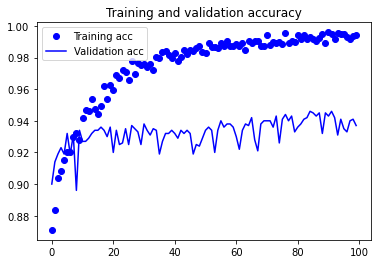

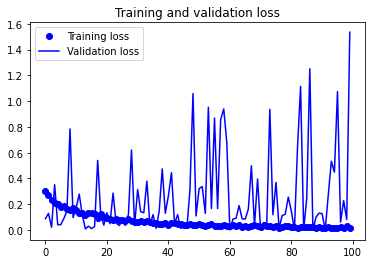

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> This curve needs to be smoothen out.

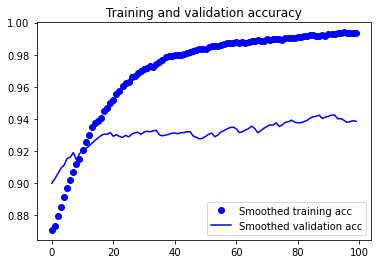

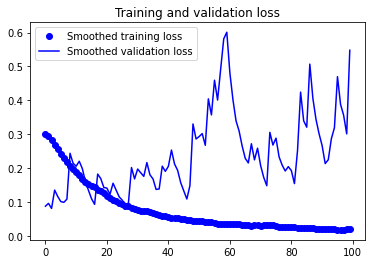

In [22]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> We have achieved a significant improvement comparing to our last result, reaching a ~94% accuracy and our model does not overfit.

Now it is time to finally run our best model on the test set.

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
Test accuracy: 0.9350000023841858


> We are getting a 93.5% accuracy on our test set.

<a id='6'></a>
## 6. Conclusion

There is definetely place for improvement as during my research I have found examples where models reached 97-98% accuracy on the test set, but given that I have only used 10% of the available data here is what I have achieved:

- 1st Model: 1 Convnet Block, 68%-70% accuracy.
- 2nd Model: 4 Convnet Block, ~72% accuracy.
- 3rd Model: 4 Convnet Block + dropout, ~ 75% accuracy 
- 4th Model: 4 Convnet Block + dropout + data augmantiation, reaching 84%
- 5th model: Leveraged Network + Dropout: 90%
- 6th model: Leveraged Network + Dropout + Data Augmentation: 90%
- 7th model: Fine-Tuned Leveraged Network + Dropout + Data Augmentation: 94%

Our best model has achieved 94% accuracy on the test set using only 2000 training samples.